In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, precision_recall_curve, auc
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import class_weight
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_iris


In [22]:
# Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.
# Load dataset (Iris dataset)
iris = load_iris()
X = iris.data  # Features
y = (iris.target == 2).astype(int)  # Convert to binary classification (class 2 vs others)

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [23]:
# Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy.

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with L1 penalty (Lasso)
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.8550


In [24]:
# Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients.
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with L2 penalty (Ridge)
model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

# Print model coefficients
print('Model Coefficients:', model.coef_)

Model Accuracy: 0.8550
Model Coefficients: [[ 0.09313067 -0.57234579  0.22858796  0.10022439 -0.02330397  1.62784037
  -0.0850261  -0.01814307 -0.02321708  0.00901688  0.20647711  0.44047538
   0.03047508  0.13712753 -0.92389495  0.08010283  0.07022722 -0.14921618
  -1.19160279  0.10917366]]


In [25]:
# Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with Elastic Net penalty
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

# Print model coefficients
print('Model Coefficients:', model.coef_)


Model Accuracy: 0.8550
Model Coefficients: [[ 0.08772963 -0.18558237  0.22361164  0.09430098 -0.01741445  1.8970713
  -0.08039025 -0.01217671 -0.01652056  0.00435164  0.20118399  0.43742187
   0.0253483   0.13111478 -0.68549696  0.07237994  0.06413238 -0.14336783
  -1.19241539  0.10471421]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
# Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

# Generate a synthetic dataset for multiclass classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model for multiclass classification using one-vs-rest (OvR)
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, multi_class='ovr', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

# Print model coefficients
print('Model Coefficients:', model.coef_)

Model Accuracy: 0.6050
Model Coefficients: [[-5.45699970e-01  3.12580245e-01  0.00000000e+00  4.54118939e-01
   4.18927229e-01 -2.47299816e-02  3.11987554e-02  1.23571505e-01
   1.21256014e-01 -1.60504564e-02  8.04285072e-02 -7.35365243e-02
  -6.20196212e-01 -2.39700588e-01 -7.35223208e-01  0.00000000e+00
   4.10145650e-01  9.22613739e-02 -2.56893096e-01 -1.36101625e-01]
 [ 1.46762334e+00  2.56785389e-01 -2.25455138e-04 -1.01937832e+00
   3.14366998e-01  1.04810805e-01  1.52393834e-01 -1.35283645e-01
   3.72371294e-01  0.00000000e+00  3.57950867e-01  7.40472692e-02
   2.12203283e-01  9.89482335e-02  2.38652095e-02 -1.22525988e-01
   5.22487886e-01  1.03501248e-02  0.00000000e+00  4.46672898e-01]
 [-8.24640828e-01 -4.96068478e-01 -2.58012518e-01  2.89035205e-01
  -5.37236829e-01 -7.53692739e-02 -3.64023900e-01  1.77821522e-02
  -3.60381761e-01  3.86701301e-01 -4.99557518e-01  7.40597712e-02
   3.00755696e-01  3.01274403e-01  2.53591009e-01  0.00000000e+00
  -8.00700187e-01 -4.70225966e-

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
# Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.
# Generate a synthetic dataset for multiclass classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.5]  # Only relevant for elasticnet
}

# Train Logistic Regression model with GridSearchCV
grid_search = GridSearchCV(LogisticRegression(solver='saga', multi_class='ovr', random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Model Accuracy: {accuracy:.4f}')

# Print model coefficients
print('Model Coefficients:', best_model.coef_)

Best Parameters: {'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'l2'}
Model Accuracy: 0.6150
Model Coefficients: [[-4.39493820e-01  3.04718635e-01  1.27041389e-01  4.33739258e-01
   2.49808735e-01 -2.59508855e-02  1.32374387e-01  1.18234986e-01
   1.56587088e-01 -2.35416095e-01  1.42239901e-01 -7.30417330e-02
  -4.19365868e-01 -2.78151712e-01 -4.05151939e-01  2.39872584e-01
   2.88434738e-01  1.56644647e-01 -2.70357313e-01 -2.83964771e-01]
 [ 1.21156340e+00  1.87674424e-01  7.87069338e-04 -7.79787115e-01
   2.67829013e-01  8.92319522e-02  2.07675690e-01 -1.23811213e-01
   3.06056694e-01 -6.40215731e-04  3.50290761e-01  5.98292758e-02
   1.48003062e-01  7.43699782e-02  1.79129659e-01 -2.37069014e-01
   4.07841892e-01 -4.84398911e-02 -7.21579289e-02  3.67186196e-01]
 [-6.94665548e-01 -4.20501777e-01 -1.92002864e-01  2.76295959e-01
  -4.96875801e-01 -6.78061752e-02 -3.20348506e-01  1.37874890e-02
  -2.94457582e-01  3.15980682e-01 -4.53981891e-01  7.13606710e-02
   2.96370721e-01  2.72510978e-01  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [21]:
# Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.
# Generate a synthetic dataset for multiclass classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define Logistic Regression model
model = LogisticRegression(solver='saga', multi_class='ovr', penalty='l2', C=1.0, random_state=42)

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Calculate average accuracy
average_accuracy = np.mean(scores)
print(f'Average Accuracy: {average_accuracy:.4f}')


Average Accuracy: 0.6720


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

In [ ]:
# Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.
# Load dataset from CSV file
df = pd.read_csv('dataset.csv')

# Assume the last column is the target variable
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define hyperparameter grid
param_dist = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0.5]  # Only relevant for elasticnet
}

# Train Logistic Regression model with RandomizedSearchCV
random_search = RandomizedSearchCV(LogisticRegression(multi_class='ovr', random_state=42), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Model Accuracy: {accuracy:.4f}')

In [ ]:
# Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.
# Load dataset from CSV file
df = pd.read_csv('dataset.csv')

# Assume the last column is the target variable
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model for multiclass classification using One-vs-One (OvO)
model = LogisticRegression(multi_class='ovo', solver='lbfgs', penalty='l2', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')

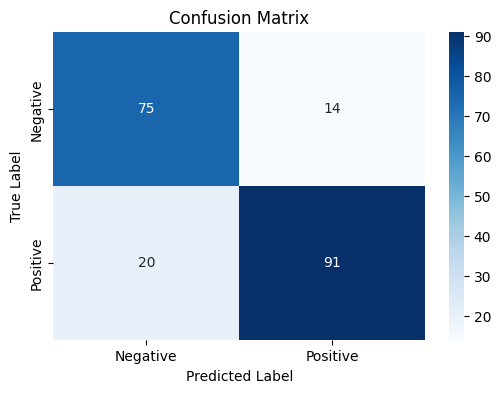

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



In [22]:
# Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.
# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

In [24]:
# Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.
# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(1000, 5)
y = np.random.randint(0, 2, 1000)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.54
Recall: 0.74
F1-Score: 0.62


In [26]:
# Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.
# Generate synthetic imbalanced dataset
np.random.seed(42)
X = np.random.rand(1000, 5)
y = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])  # Imbalanced dataset

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: weights[i] for i in range(len(weights))}

# Train Logistic Regression model with class weights
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.08
Recall: 0.41
F1-Score: 0.13


In [4]:
# # Load dataset
iris = load_iris()
X = iris.data  # Features
y = (iris.target != 0).astype(int)  # Binary classification (Setosa vs. Non-Setosa)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression without scaling
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred)
print(f"Accuracy without scaling: {accuracy_no_scaling:.4f}")

# Apply Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with scaling
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling: {accuracy_with_scaling:.4f}")


Accuracy without scaling: 1.0000
Accuracy with scaling: 1.0000


In [7]:
# Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC scor.
# Load dataset
iris = load_iris()
X = iris.data  # Features
y = (iris.target != 0).astype(int)  # Binary classification (Setosa vs. Non-Setosa)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with scaling
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
y_pred_prob = model_scaled.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy with scaling: {accuracy_with_scaling:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy with scaling: 1.0000
ROC-AUC Score: 1.0000


In [8]:
# Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.
# Load dataset
iris = load_iris()
X = iris.data  # Features
y = (iris.target != 0).astype(int)  # Binary classification (Setosa vs. Non-Setosa)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with custom learning rate (C=0.5)
model_scaled = LogisticRegression(C=0.5)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
y_pred_prob = model_scaled.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy with scaling (C=0.5): {accuracy_with_scaling:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Accuracy with scaling (C=0.5): 1.0000
ROC-AUC Score: 1.0000


In [9]:
# Write a Python program to train Logistic Regression and identify important features based on model coefficients.
# Load dataset
iris = load_iris()
X = iris.data  # Features
y = (iris.target != 0).astype(int)  # Binary classification (Setosa vs. Non-Setosa)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with custom learning rate (C=0.5)
model_scaled = LogisticRegression(C=0.5)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
y_pred_prob = model_scaled.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy with scaling (C=0.5): {accuracy_with_scaling:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Identify important features
feature_importance = pd.DataFrame({'Feature': iris.feature_names, 'Coefficient': model_scaled.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance based on Coefficients:")
print(feature_importance)

Accuracy with scaling (C=0.5): 1.0000
ROC-AUC Score: 1.0000

Feature Importance based on Coefficients:
             Feature  Coefficient
2  petal length (cm)     1.402280
3   petal width (cm)     1.298197
0  sepal length (cm)     0.865919
1   sepal width (cm)    -1.019791


In [11]:
# Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.
# Load dataset
iris = load_iris()
X = iris.data  # Features
y = (iris.target != 0).astype(int)  # Binary classification (Setosa vs. Non-Setosa)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with custom learning rate (C=0.5)
model_scaled = LogisticRegression(C=0.5)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
y_pred_prob = model_scaled.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
roc_auc = roc_auc_score(y_test, y_pred_prob)
kappa_score = cohen_kappa_score(y_test, y_pred_scaled)

print(f"Accuracy with scaling (C=0.5): {accuracy_with_scaling:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Cohen's Kappa Score: {kappa_score:.4f}")

# Identify important features
feature_importance = pd.DataFrame({'Feature': iris.feature_names, 'Coefficient': model_scaled.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance based on Coefficients:")
print(feature_importance)

Accuracy with scaling (C=0.5): 1.0000
ROC-AUC Score: 1.0000
Cohen's Kappa Score: 1.0000

Feature Importance based on Coefficients:
             Feature  Coefficient
2  petal length (cm)     1.402280
3   petal width (cm)     1.298197
0  sepal length (cm)     0.865919
1   sepal width (cm)    -1.019791


Accuracy with scaling (C=0.5): 1.0000
ROC-AUC Score: 1.0000
Cohen's Kappa Score: 1.0000

Feature Importance based on Coefficients:
             Feature  Coefficient
2  petal length (cm)     1.402280
3   petal width (cm)     1.298197
0  sepal length (cm)     0.865919
1   sepal width (cm)    -1.019791


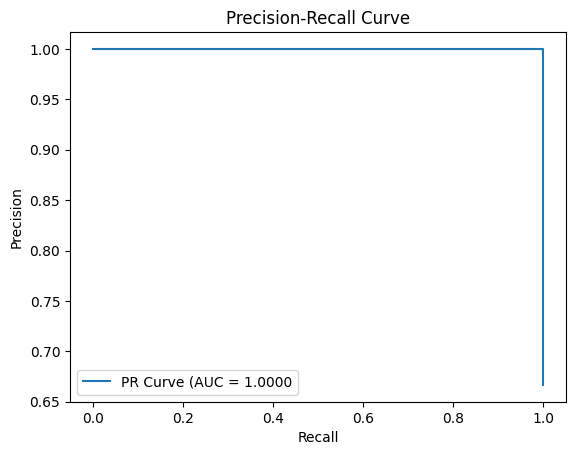

In [13]:
# Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classificatio.
# Load dataset
iris = load_iris()
X = iris.data  # Features
y = (iris.target != 0).astype(int)  # Binary classification (Setosa vs. Non-Setosa)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with custom learning rate (C=0.5)
model_scaled = LogisticRegression(C=0.5)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
y_pred_prob = model_scaled.predict_proba(X_test_scaled)[:, 1]

# Evaluate model
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)
roc_auc = roc_auc_score(y_test, y_pred_prob)
kappa_score = cohen_kappa_score(y_test, y_pred_scaled)

print(f"Accuracy with scaling (C=0.5): {accuracy_with_scaling:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Cohen's Kappa Score: {kappa_score:.4f}")

# Identify important features
feature_importance = pd.DataFrame({'Feature': iris.feature_names, 'Coefficient': model_scaled.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("\nFeature Importance based on Coefficients:")
print(feature_importance)

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [14]:
# Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.
from sklearn.datasets import load_breast_cancer
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']
results = {}

# Train and evaluate models
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[solver] = accuracy
    print(f"Solver: {solver}, Accuracy: {accuracy:.4f}")

# Print summary of results
print("\nAccuracy comparison of different solvers:")
for solver, acc in results.items():
    print(f"{solver}: {acc:.4f}")

Solver: liblinear, Accuracy: 0.9737
Solver: saga, Accuracy: 0.9737
Solver: lbfgs, Accuracy: 0.9737

Accuracy comparison of different solvers:
liblinear: 0.9737
saga: 0.9737
lbfgs: 0.9737


In [15]:
# Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).
from sklearn.metrics import matthews_corrcoef
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Matthews Correlation Coefficient (MCC): 0.6593


In [16]:
#  Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression on standardized data
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print results
print(f"Accuracy on raw data: {accuracy_raw:.4f}")
print(f"Accuracy on standardized data: {accuracy_scaled:.4f}")

Accuracy on raw data: 0.9561
Accuracy on standardized data: 0.9737


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.
from sklearn.linear_model import LogisticRegressionCV
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression with cross-validation
log_reg_cv = LogisticRegressionCV(cv=5, Cs=10, random_state=42, multi_class='multinomial', max_iter=1000)
log_reg_cv.fit(X_train, y_train)

# Best C value
best_c = log_reg_cv.C_[0]
print(f"Optimal C (Regularization Strength): {best_c}")

# Predictions and accuracy
y_pred = log_reg_cv.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1908: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Optimal C (Regularization Strength): 21.54434690031882
Test Accuracy: 1.0000


In [20]:
import joblib
# Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'logistic_regression_model.pkl')
print("Model saved successfully.")

# Load the trained model
loaded_model = joblib.load('logistic_regression_model.pkl')
print("Model loaded successfully.")

# Make predictions
y_pred = loaded_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model saved successfully.
Model loaded successfully.
Model Accuracy: 0.83
